Dataset shape: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]
✅ Best K found: 5
✅ Best cross-validation accuracy: 0.9769847170590664

🏁 Test Accuracy: 0.9644

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      1.00      0.97        46
           2       0.96      1.00      0.98        44
           3       0.98      0.98      0.98        46
           4       0.98      0.93      0.95        45
           5       0.98      0.96      0.97        46
           6       0.98      0.98      0.98        45
           7       0.92      0.98      0.95        45
           8       0.97      0.91      0.94        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



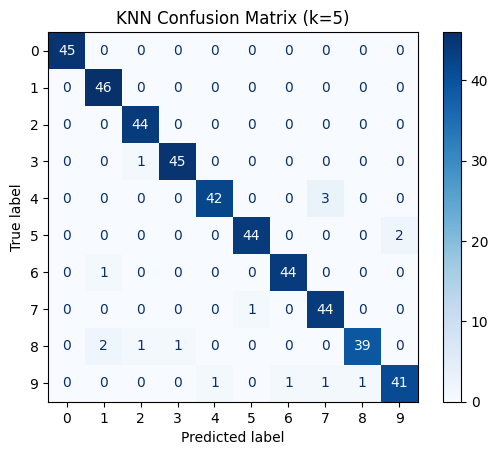

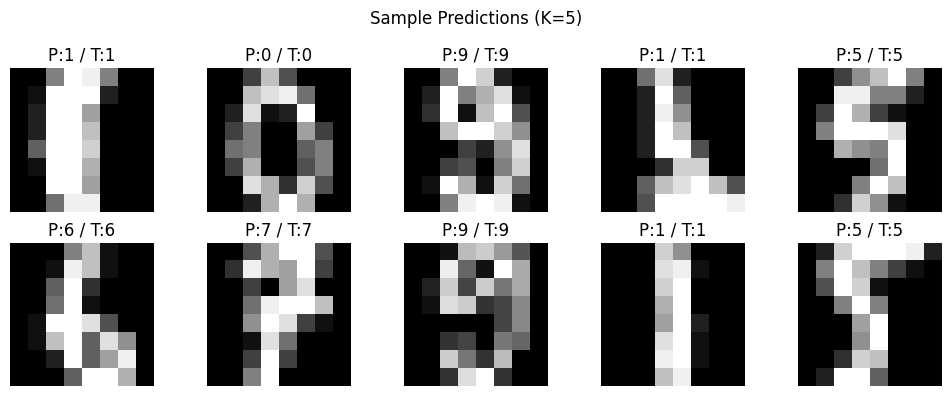


✅ Digit classification complete!


In [1]:


# 1️⃣ IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
)

# 2️⃣ LOAD THE DIGITS DATASET
digits = load_digits()
X = digits.data      # Flattened 8x8 images (64 features)
y = digits.target    # Digits 0–9

print("Dataset shape:", X.shape)
print("Target classes:", np.unique(y))

# 3️⃣ TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4️⃣ SCALE FEATURES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ HYPERPARAMETER TUNING — FIND BEST K
param_grid = {'n_neighbors': np.arange(1, 21)}  # Try k = 1 to 20
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("✅ Best K found:", grid.best_params_['n_neighbors'])
print("✅ Best cross-validation accuracy:", grid.best_score_)

# 6️⃣ TRAIN BEST MODEL
best_k = grid.best_params_['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# 7️⃣ EVALUATE MODEL
y_pred = best_knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"\n🏁 Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8️⃣ PLOT CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.show()

# 9️⃣ OPTIONAL: VISUALIZE SOME PREDICTIONS
plt.figure(figsize=(10, 4))
for i, (image, pred, true) in enumerate(zip(X_test[:10], y_pred[:10], y_test[:10])):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title(f"P:{pred} / T:{true}")
    plt.axis('off')
plt.suptitle(f"Sample Predictions (K={best_k})")
plt.tight_layout()
plt.show()

print("\n✅ Digit classification complete!")
